In [236]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [237]:
iv = np.arange(1, 10)
xv = np.array([54, 34, 26, 62, 45, 36, 53, 47, 51])
yv = np.array([22, 13,  5, 42, 16, 12, 19, 25, 30])
P = []
for j in range(iv.shape[0]):
    P.append({"i": iv[j], "x": xv[j], "y": yv[j]})


In [238]:
class SplitNode:
    def __init__(self, depth, parent, L, pos):
        self.is_leaf = False
        self.depth = depth
        self.parent = parent
        self.left = None
        self.right = None
        self.L = L
        self.pos = pos

    def __str__(self):
        s = f"depth={self.depth}, L={self.L}"
        return s
    
class LeafNode:
    def __init__(self, depth, parent, P, pos):
        self.is_leaf = True
        self.depth = depth
        self.parent = parent
        self.P = P
        self.pos = pos

    def __str__(self):
        s = f"depth={self.depth}, P={self.P}"
        return s

    
nodes = []

def build_kd(P, depth, parent, pos):

    if(len(P) == 1):
        return LeafNode(depth, parent, P[0], pos)
    if(depth%2 == 0):
        key = "y"
    else:
        key = "x"
    P = sorted(P, key=lambda P: P[key])
    if(len(P)%2 == 0):
        s = len(P)//2
    else:
        s = len(P)//2+1
    # L = P[s-1][key] # lines on points
    L = (P[s-1][key] + P[s][key]) * 0.5 # lines between points
    P1 = P[:s]
    P2 = P[s:]
    v = SplitNode(depth, parent, L, pos)
    v.left = build_kd(P1, depth+1, v, pos=(pos[0]-1.0/(2**depth), pos[1]+1))
    v.right = build_kd(P2, depth+1, v, pos=(pos[0]+1.0/(2**depth), pos[1]+1))
    return v

root = build_kd(P, depth=1, parent=None, pos=(0,0))

def print_tree(node):
    if(node is None):
        return
    print(node)
    if(not node.is_leaf):
        print_tree(node.left)
        print_tree(node.right)
    
print_tree(root)


depth=1, L=49.0
depth=2, L=14.5
depth=3, L=35.0
depth=4, L=9.0
depth=5, P={'i': 3, 'x': 26, 'y': 5}
depth=5, P={'i': 2, 'x': 34, 'y': 13}
depth=4, P={'i': 6, 'x': 36, 'y': 12}
depth=3, L=46.0
depth=4, P={'i': 5, 'x': 45, 'y': 16}
depth=4, P={'i': 8, 'x': 47, 'y': 25}
depth=2, L=26.0
depth=3, L=53.5
depth=4, P={'i': 7, 'x': 53, 'y': 19}
depth=4, P={'i': 1, 'x': 54, 'y': 22}
depth=3, L=56.5
depth=4, P={'i': 9, 'x': 51, 'y': 30}
depth=4, P={'i': 4, 'x': 62, 'y': 42}


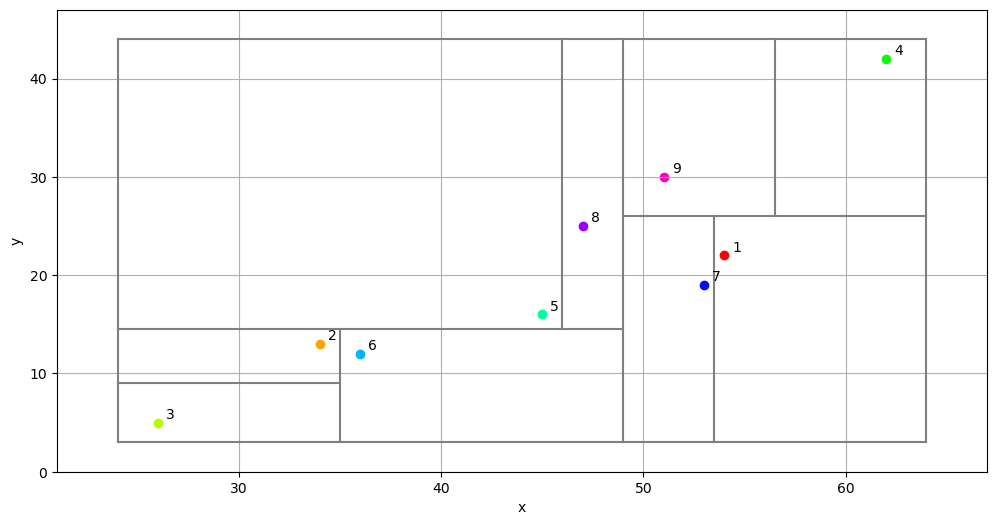

In [241]:
matplotlib.rcParams['figure.figsize'] = [12, 6]

fig, ax = plt.subplots()

x_min = np.amin(xv)-2
x_max = np.amax(xv)+2
y_min = np.amin(yv)-2
y_max = np.amax(yv)+2

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

def draw_split(node, x_min, y_min, x_max, y_max):
    if(node is None or node.is_leaf):
        return
    if(node.depth%2 == 1):
        ax.plot([node.L, node.L], [y_min, y_max], color="gray")
        draw_split(node.left,  x_min, y_min, node.L, y_max)
        draw_split(node.right, node.L, y_min, x_max, y_max)
    else:
        ax.plot([x_min, x_max], [node.L, node.L], color="gray")
        draw_split(node.left,  x_min, y_min, x_max, node.L)
        draw_split(node.right, x_min, node.L, x_max, y_max)

draw_split(root, x_min, y_min, x_max, y_max)

cmap = matplotlib.colormaps['hsv']
colors = cmap(np.linspace(0, 1.0, len(P), endpoint=False))

for j in range(len(P)):
    ax.scatter(xv[j], yv[j], label=iv[j], color=colors[j])
    ax.text(xv[j]+0.4, yv[j]+0.4, str(iv[j]),)

ax.plot([x_min, x_max], [y_min, y_min], color="gray")
ax.plot([x_min, x_max], [y_max, y_max], color="gray")
ax.plot([x_min, x_min], [y_min, y_max], color="gray")
ax.plot([x_max, x_max], [y_min, y_max], color="gray")

ax.set_xlim(x_min-3, x_max+3)
ax.set_ylim(y_min-3, y_max+3)

ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.legend()

plt.show()

depth: 5
1
2
4
8
2


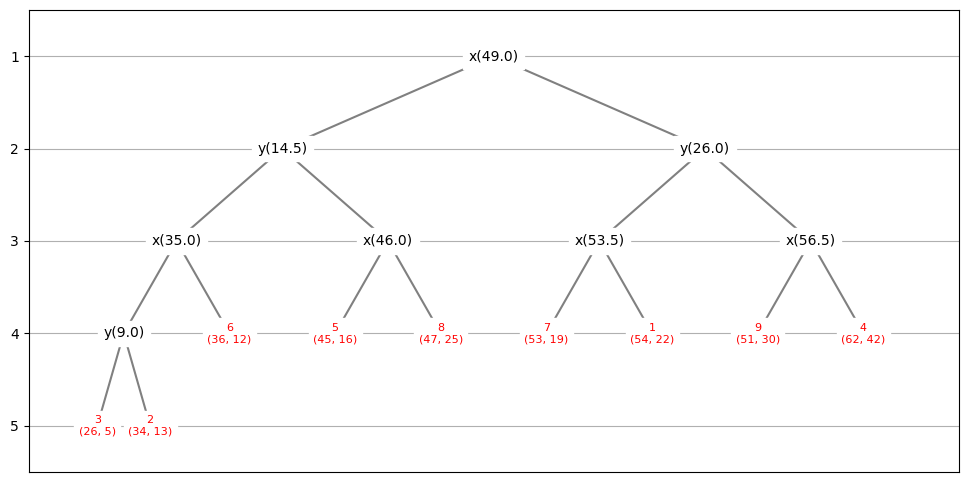

In [255]:

depth = 0
def find_depth(node):
    global depth
    if(node.is_leaf):
        depth = max(node.depth, depth)
    else:
        find_depth(node.left)
        find_depth(node.right)
find_depth(root)

print(f"depth: {depth}")
levels = [[] for i in range(depth)]

def gen_levels(node):
    if(node is None):
        return
    level = node.depth-1
    levels[level].append(node)
    if(not node.is_leaf):
        gen_levels(node.left)
        gen_levels(node.right)

gen_levels(root)

matplotlib.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()

width = depth**2
height = (depth+1)

for i, level in enumerate(levels):

    w = width/2

    for j, node in enumerate(levels[i]):
        x = node.pos[0]*w
        y = (node.pos[1]+1)
        if(node.is_leaf):
            label = str(node.P["i"]) + "\n" + str((node.P["x"], node.P["y"]))
            ax.text(x, y, label, ha="center", va="center", color="red", backgroundcolor="white", fontsize=8)
        else:
            if(node.depth%2 == 0):
                key = "y"
            else:
                key = "x"
            label = f"{key}({node.L})"
            ax.text(x, y, label, ha="center", va="center", backgroundcolor="white")

        if(node.parent is not None):
            px = node.parent.pos[0]*w
            py = (node.parent.pos[1]+1)
            ax.plot([x, px], [y, py], color="gray")

    print(len(level))

ax.set_xlim(-width*1.1/2, width*1.1/2)
ax.set_ylim(height-0.5, 0.5)

ax.set_yticks(np.arange(1, depth+1))
ax.set_xticks([])

ax.grid(True)

plt.show()


